In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import json
import os

from sklearn.tree import DecisionTreeClassifier

from data_cleaning import DataCleaner, AutomaticCleaner, HypothesesFinder, DataExtractor

In [2]:
checker = HypothesesFinder()
extractor = DataExtractor()

In [3]:
df = pd.read_csv('sem_merged_database.csv')

In [4]:
sem=df
sem['label'] = sem['ignorance/belief wrt int'].fillna('anti-rogative')
with open('values_of_columns.json', 'r') as f:
  data = json.load(f)

for value in data['ignorance/belief wrt int']:
    sem['label'] = sem['label'].replace(value, 'responsive')
#Check if the values are correct
#Drop other columns which are not defined for both anti-rogatives and responsive
sem = sem.drop(['ignorance/belief wrt int','gradability wrt int', 'Q-to-P veridicality', 'Q-to-P distributivity', 'P-to-Q distributivity'], axis =1) 
#Drop rogative predicates
sem = sem.dropna()
print(sem['label'].value_counts())
sem = sem.reset_index()
sem = sem.drop('index', axis=1)

responsive       411
anti-rogative    208
Name: label, dtype: int64


In [5]:
y = sem.label

In [6]:
sem.columns

Index(['language', 'predicate', 'English translation', 'predicate class',
       'veridicality', 'conjoined with negation', 'conjoined with complement',
       'projection through negation', 'neg-raising', 'likelihood',
       'unlikelihood', 'equal likelihood', 'certainty', 'counter-certainty',
       'uncertainty', 'preference', 'opposition', 'indifference',
       'focus sensitivity', 'gradability wrt decl', 'label'],
      dtype='object')

In [7]:
# Hintikka (1975), Ginzburg (1995), Lahiri (2002), Egre 2008
# Veridicality hypothesis
checker.conjunctive_check(sem, y, ['veridicality'])

This conjunction does not yield any hypotheses


[]

In [8]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])

In [9]:
X.columns

Index(['focus sensitivity', 'veridicality_anti-veridical',
       'veridicality_neither', 'veridicality_typically anti-veridical',
       'veridicality_typically veridical', 'veridicality_veridical',
       'conjoined with negation_contradictory',
       'conjoined with negation_neither', 'conjoined with negation_redundant',
       'conjoined with complement_contradictory',
       'conjoined with complement_neither',
       'conjoined with complement_redundant',
       'conjoined with complement_typically redundant',
       'projection through negation_neither',
       'projection through negation_projective',
       'projection through negation_reversal',
       'projection through negation_typically projective',
       'projection through negation_typically reversal',
       'projection through negation_undecided', 'neg-raising_0',
       'neg-raising_1', 'neg-raising_typically neg-raising',
       'neg-raising_undecided', 'likelihood_always', 'likelihood_compatible',
       'likelih

In [10]:
X_ver = X[['veridicality_anti-veridical',
       'veridicality_neither', 'veridicality_typically anti-veridical',
       'veridicality_typically veridical', 'veridicality_veridical']]
model = DecisionTreeClassifier()
model.fit(X_ver,y)

DecisionTreeClassifier()

In [11]:
branches = checker.retreive_text_branches(model, X_ver, y, exception_size=8, exception_indexes=True)
branches

[[('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('veridicality_typically veridical', '0'),
  ('responsive',
   108,
   'exceptions: 8',
   'exception_indexes: [154, 155, 187, 276, 277, 278, 320, 480]'),
  ('veridicality_veridical', '1'),
  ('responsive',
   97,
   'exceptions: 7',
   'exception_indexes: [154, 187, 276, 277, 278, 320, 480]')],
 [('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('veridicality_typically veridical', '0'),
  ('responsive',
   108,
   'exceptions: 8',
   'exception_indexes: [154, 155, 187, 276, 277, 278, 320, 480]'),
  ('veridicality_veridical', '0'),
  ('responsive', 11, 'exceptions: 1', 'exception_indexes: [155]')],
 [('veridicality_neither', '0'),
  ('veridicality_typically anti-veridical', '1'),
  ('anti-rogative', 7, 'exceptions: 1', 'exception_indexes: [385]')]]

In [12]:
X_ver = X[['veridicality_anti-veridical', 'veridicality_typically anti-veridical',
       'veridicality_typically veridical', 'veridicality_veridical']]
model = DecisionTreeClassifier()
model.fit(X_ver,y)
branches = checker.retreive_text_branches(model, X_ver, y, exception_size=14)
branches

[[('veridicality_veridical', '1'), ('responsive', 97, 'exceptions: 7')],
 [('veridicality_veridical', '0'),
  ('veridicality_typically veridical', '0'),
  ('veridicality_anti-veridical', '1'),
  ('responsive', 11, 'exceptions: 1')],
 [('veridicality_veridical', '0'),
  ('veridicality_typically veridical', '0'),
  ('veridicality_anti-veridical', '0'),
  ('veridicality_typically anti-veridical', '1'),
  ('anti-rogative', 7, 'exceptions: 1')]]

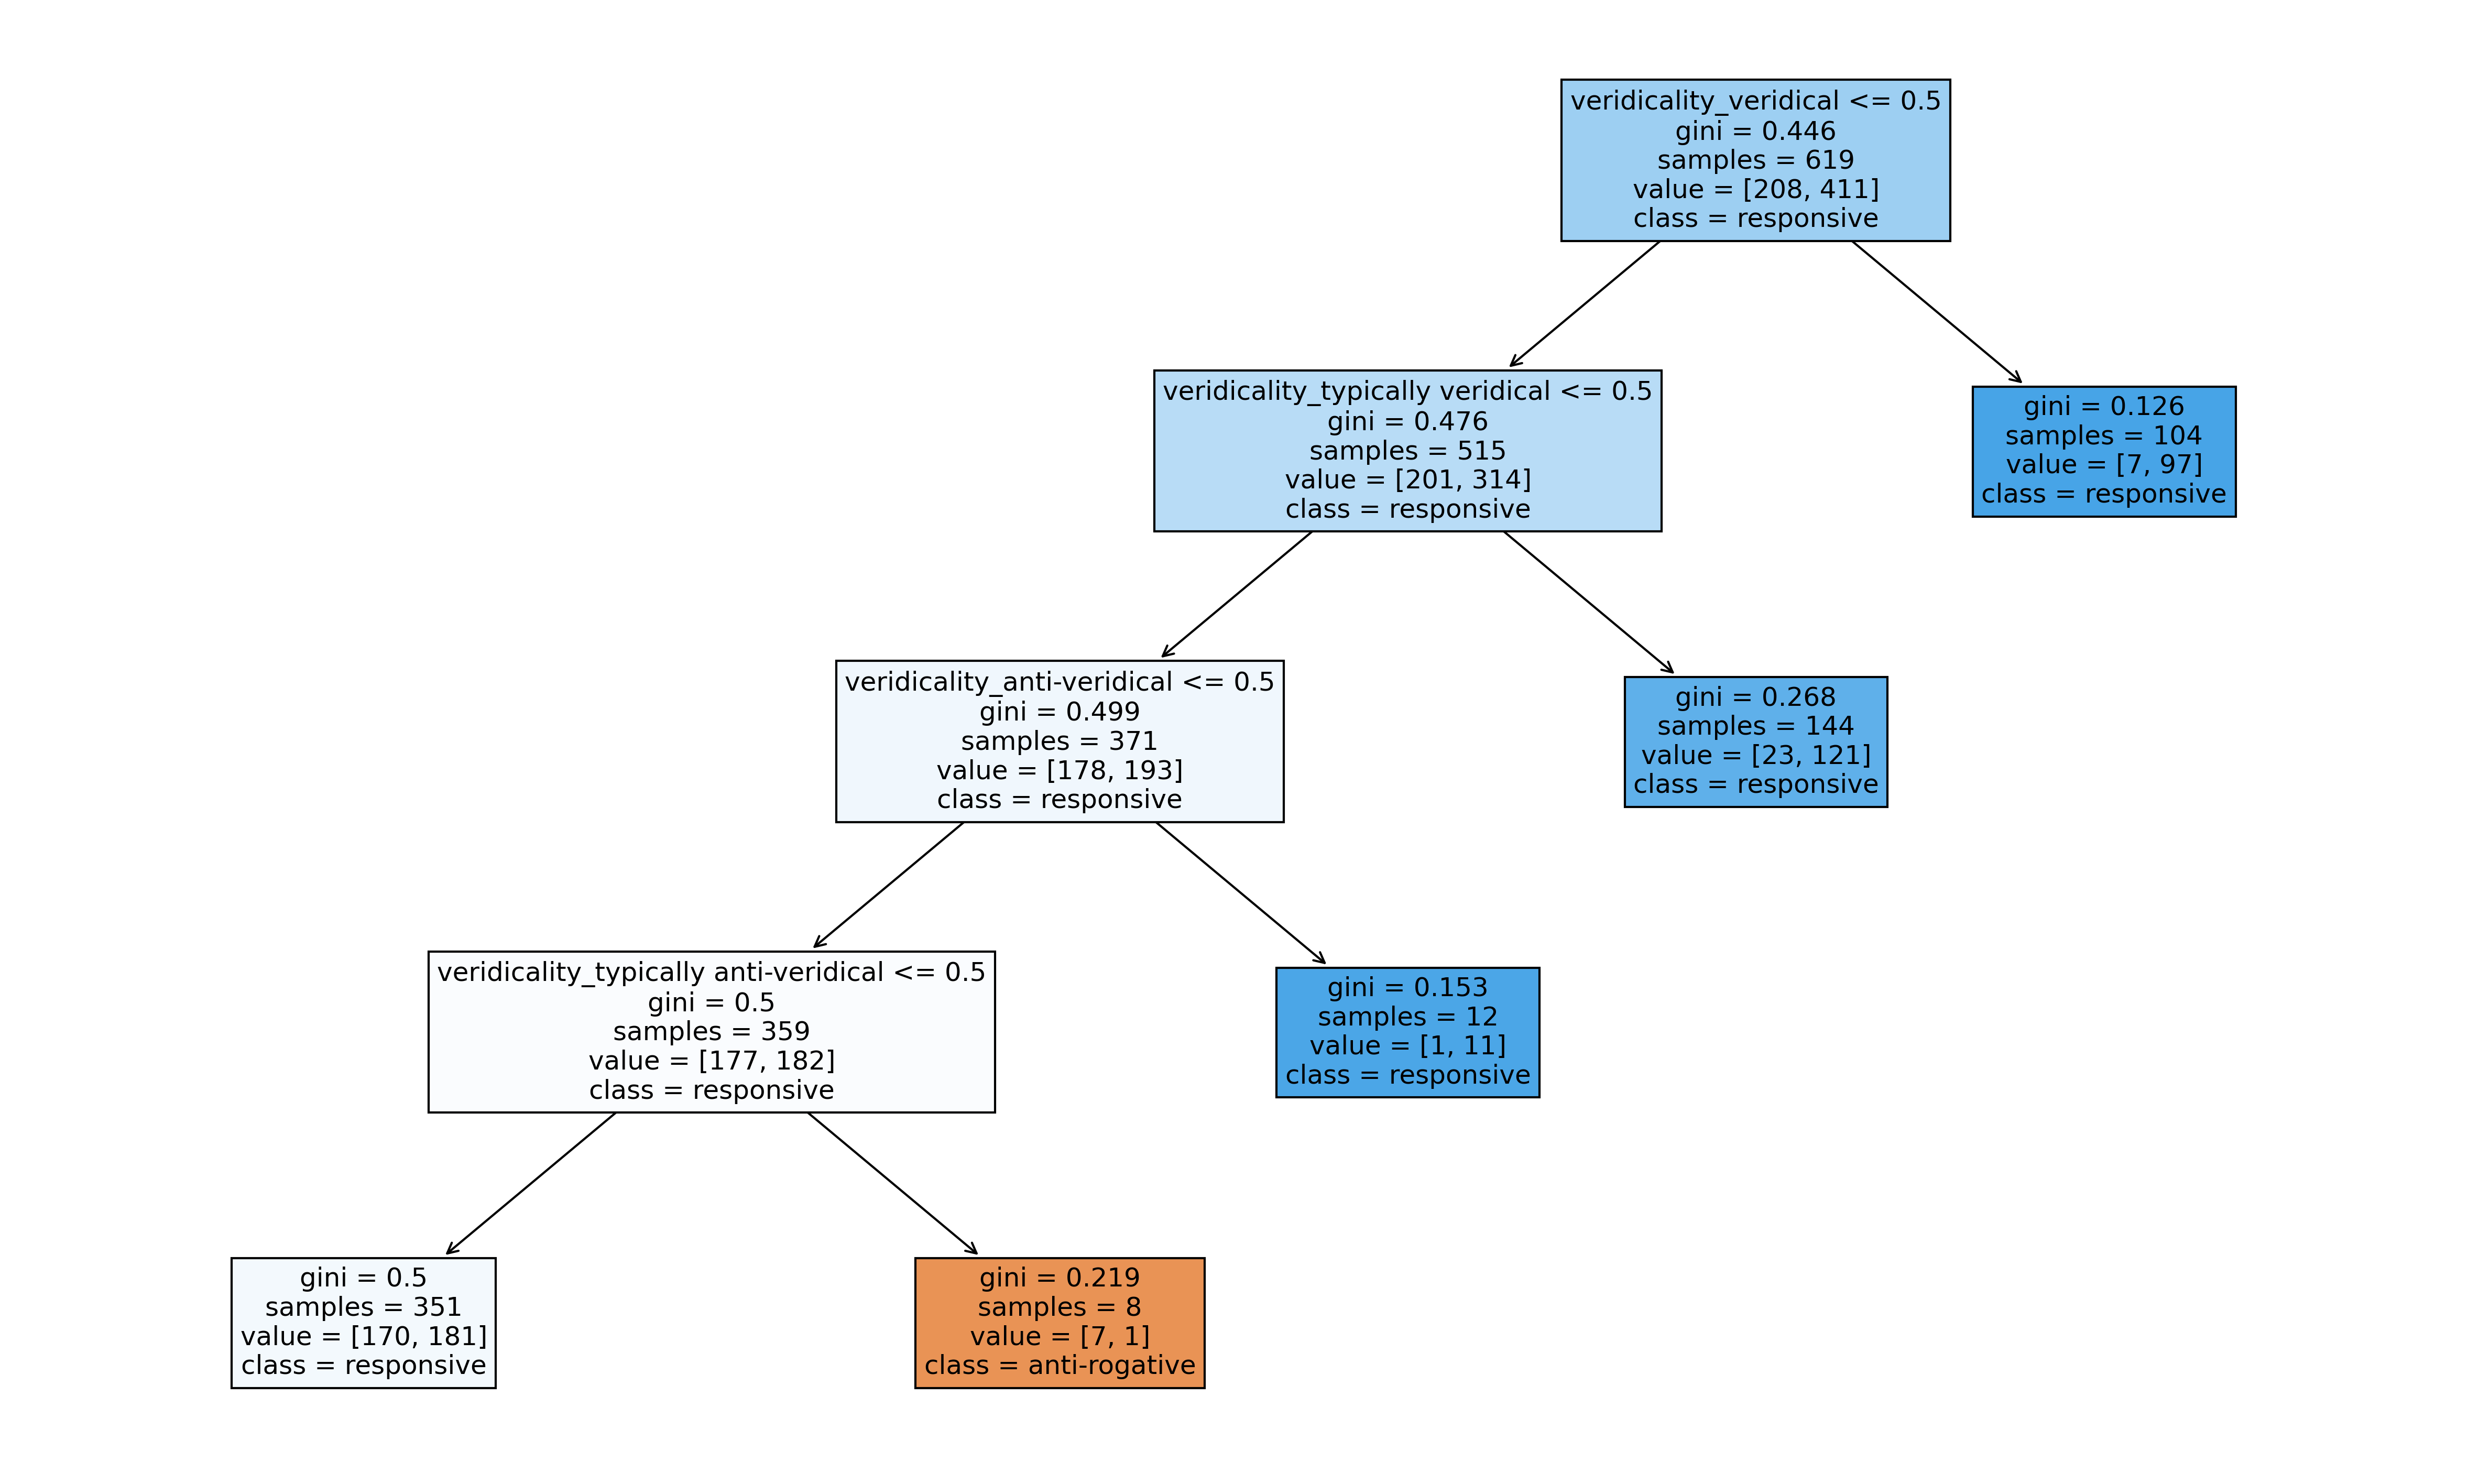

In [13]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,12), dpi=300)
plot_tree(model, feature_names=X_ver.columns, filled=True, fontsize=12, class_names=["anti-rogative", "responsive"]);

In [14]:
branches = checker.forest_based_discovery(X_ver,y,limit = 3, exception_size=8,exception_indexes=True)
branches

[[('veridicality_veridical', '1'),
  ('responsive',
   97,
   'exceptions: 7',
   'exception_indexes: [154, 187, 276, 277, 278, 320, 480]')],
 [('veridicality_typically veridical', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('veridicality_anti-veridical', '1'),
  ('responsive', 11, 'exceptions: 1', 'exception_indexes: [155]')],
 [('veridicality_typically veridical', '0'),
  ('veridicality_typically anti-veridical', '1'),
  ('anti-rogative', 7, 'exceptions: 1', 'exception_indexes: [385]')],
 [('veridicality_veridical', '0'),
  ('veridicality_typically anti-veridical', '0'),
  ('veridicality_anti-veridical', '1'),
  ('responsive', 11, 'exceptions: 1', 'exception_indexes: [155]')],
 [('veridicality_veridical', '0'),
  ('veridicality_typically anti-veridical', '1'),
  ('anti-rogative', 7, 'exceptions: 1', 'exception_indexes: [385]')],
 [('veridicality_veridical', '0'),
  ('veridicality_typically veridical', '0'),
  ('veridicality_anti-veridical', '1'),
  ('responsive', 11, '

In [15]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'],remove_typically=True)
X.columns

Index(['focus sensitivity', 'veridicality_anti-veridical',
       'veridicality_neither', 'veridicality_veridical',
       'conjoined with negation_contradictory',
       'conjoined with negation_neither', 'conjoined with negation_redundant',
       'conjoined with complement_contradictory',
       'conjoined with complement_neither',
       'conjoined with complement_redundant',
       'projection through negation_neither',
       'projection through negation_projective',
       'projection through negation_reversal',
       'projection through negation_undecided', 'neg-raising_0',
       'neg-raising_1', 'neg-raising_neither', 'neg-raising_undecided',
       'likelihood_always', 'likelihood_compatible', 'likelihood_incompatible',
       'unlikelihood_always', 'unlikelihood_compatible',
       'unlikelihood_incompatible', 'equal likelihood_compatible',
       'equal likelihood_incompatible', 'certainty_always',
       'certainty_compatible', 'certainty_incompatible',
       'counter-c

In [16]:
X_ver = X[['veridicality_anti-veridical',
       'veridicality_neither', 'veridicality_veridical']]
model = DecisionTreeClassifier()
model.fit(X_ver,y)
branches = checker.retreive_text_branches(model, X_ver, y, exception_size=8, exception_indexes=True)
branches

[[('veridicality_neither', '0'),
  ('responsive',
   108,
   'exceptions: 8',
   'exception_indexes: [154, 155, 187, 276, 277, 278, 320, 480]'),
  ('veridicality_veridical', '1'),
  ('responsive',
   97,
   'exceptions: 7',
   'exception_indexes: [154, 187, 276, 277, 278, 320, 480]')],
 [('veridicality_neither', '0'),
  ('responsive',
   108,
   'exceptions: 8',
   'exception_indexes: [154, 155, 187, 276, 277, 278, 320, 480]'),
  ('veridicality_veridical', '0'),
  ('responsive', 11, 'exceptions: 1', 'exception_indexes: [155]')]]

In [17]:
sem.iloc[[154, 187, 276, 277, 278, 320, 480]]

,language,predicate,English translation,predicate class,veridicality,conjoined with negation,conjoined with complement,projection through negation,neg-raising,likelihood,...,equal likelihood,certainty,counter-certainty,uncertainty,preference,opposition,indifference,focus sensitivity,gradability wrt decl,label
154,german,recht haben,be right,doxastic evaluative / communication verb,veridical,contradictory,redundant,reversal,undecided,always,...,incompatible,typically,incompatible,compatible,compatible,compatible,compatible,0.0,0,anti-rogative
187,Greek,metaniono,regret,emotive factive,veridical,contradictory,redundant,projective,0,always,...,incompatible,always,incompatible,incompatible,incompatible,always,incompatible,1.0,1,anti-rogative
276,Hindi,khush,be happy,emotive factive,veridical,contradictory,redundant,projective,0,always,...,incompatible,always,incompatible,incompatible,always,incompatible,incompatible,1.0,1,anti-rogative
277,Hindi,hairaan,be surprised,emotive factive,veridical,contradictory,redundant,neither,0,always,...,incompatible,always,incompatible,incompatible,incompatible,always,incompatible,1.0,1,anti-rogative
278,Hindi,khed,regret,emotive factive,veridical,contradictory,redundant,projective,0,always,...,incompatible,always,incompatible,incompatible,incompatible,always,incompatible,1.0,1,anti-rogative
320,italian,rimpiangere/rammaricarsi,regret,emotive factive,veridical,contradictory,redundant,projective,0,always,...,incompatible,always,incompatible,incompatible,incompatible,always,incompatible,1.0,1,anti-rogative
480,Polish,żałować,regret,emotive factive,veridical,contradictory,redundant,projective,0,always,...,incompatible,always,incompatible,incompatible,incompatible,always,incompatible,1.0,1,anti-rogative


In [20]:
sem.iloc[[154, 187, 276, 277, 278, 320, 480]][['language','predicate','English translation','veridicality','label']]

,language,predicate,English translation,veridicality,label
154,german,recht haben,be right,veridical,anti-rogative
187,Greek,metaniono,regret,veridical,anti-rogative
276,Hindi,khush,be happy,veridical,anti-rogative
277,Hindi,hairaan,be surprised,veridical,anti-rogative
278,Hindi,khed,regret,veridical,anti-rogative
320,italian,rimpiangere/rammaricarsi,regret,veridical,anti-rogative
480,Polish,żałować,regret,veridical,anti-rogative


In [21]:
ver_ex_df = sem.iloc[[154, 187, 276, 277, 278, 320, 480]][['language','predicate','English translation','veridicality','label']]
ver_ex_df.to_csv('ver_ex_df.csv', index=False)

In [22]:
X = extractor.get_X(sem, cols=['language', 'predicate', 'English translation', 'predicate class'])
X_nr = X[['neg-raising_0',
       'neg-raising_1', 'neg-raising_typically neg-raising',
       'neg-raising_undecided']]
model = DecisionTreeClassifier()
model.fit(X_nr,y)


DecisionTreeClassifier()

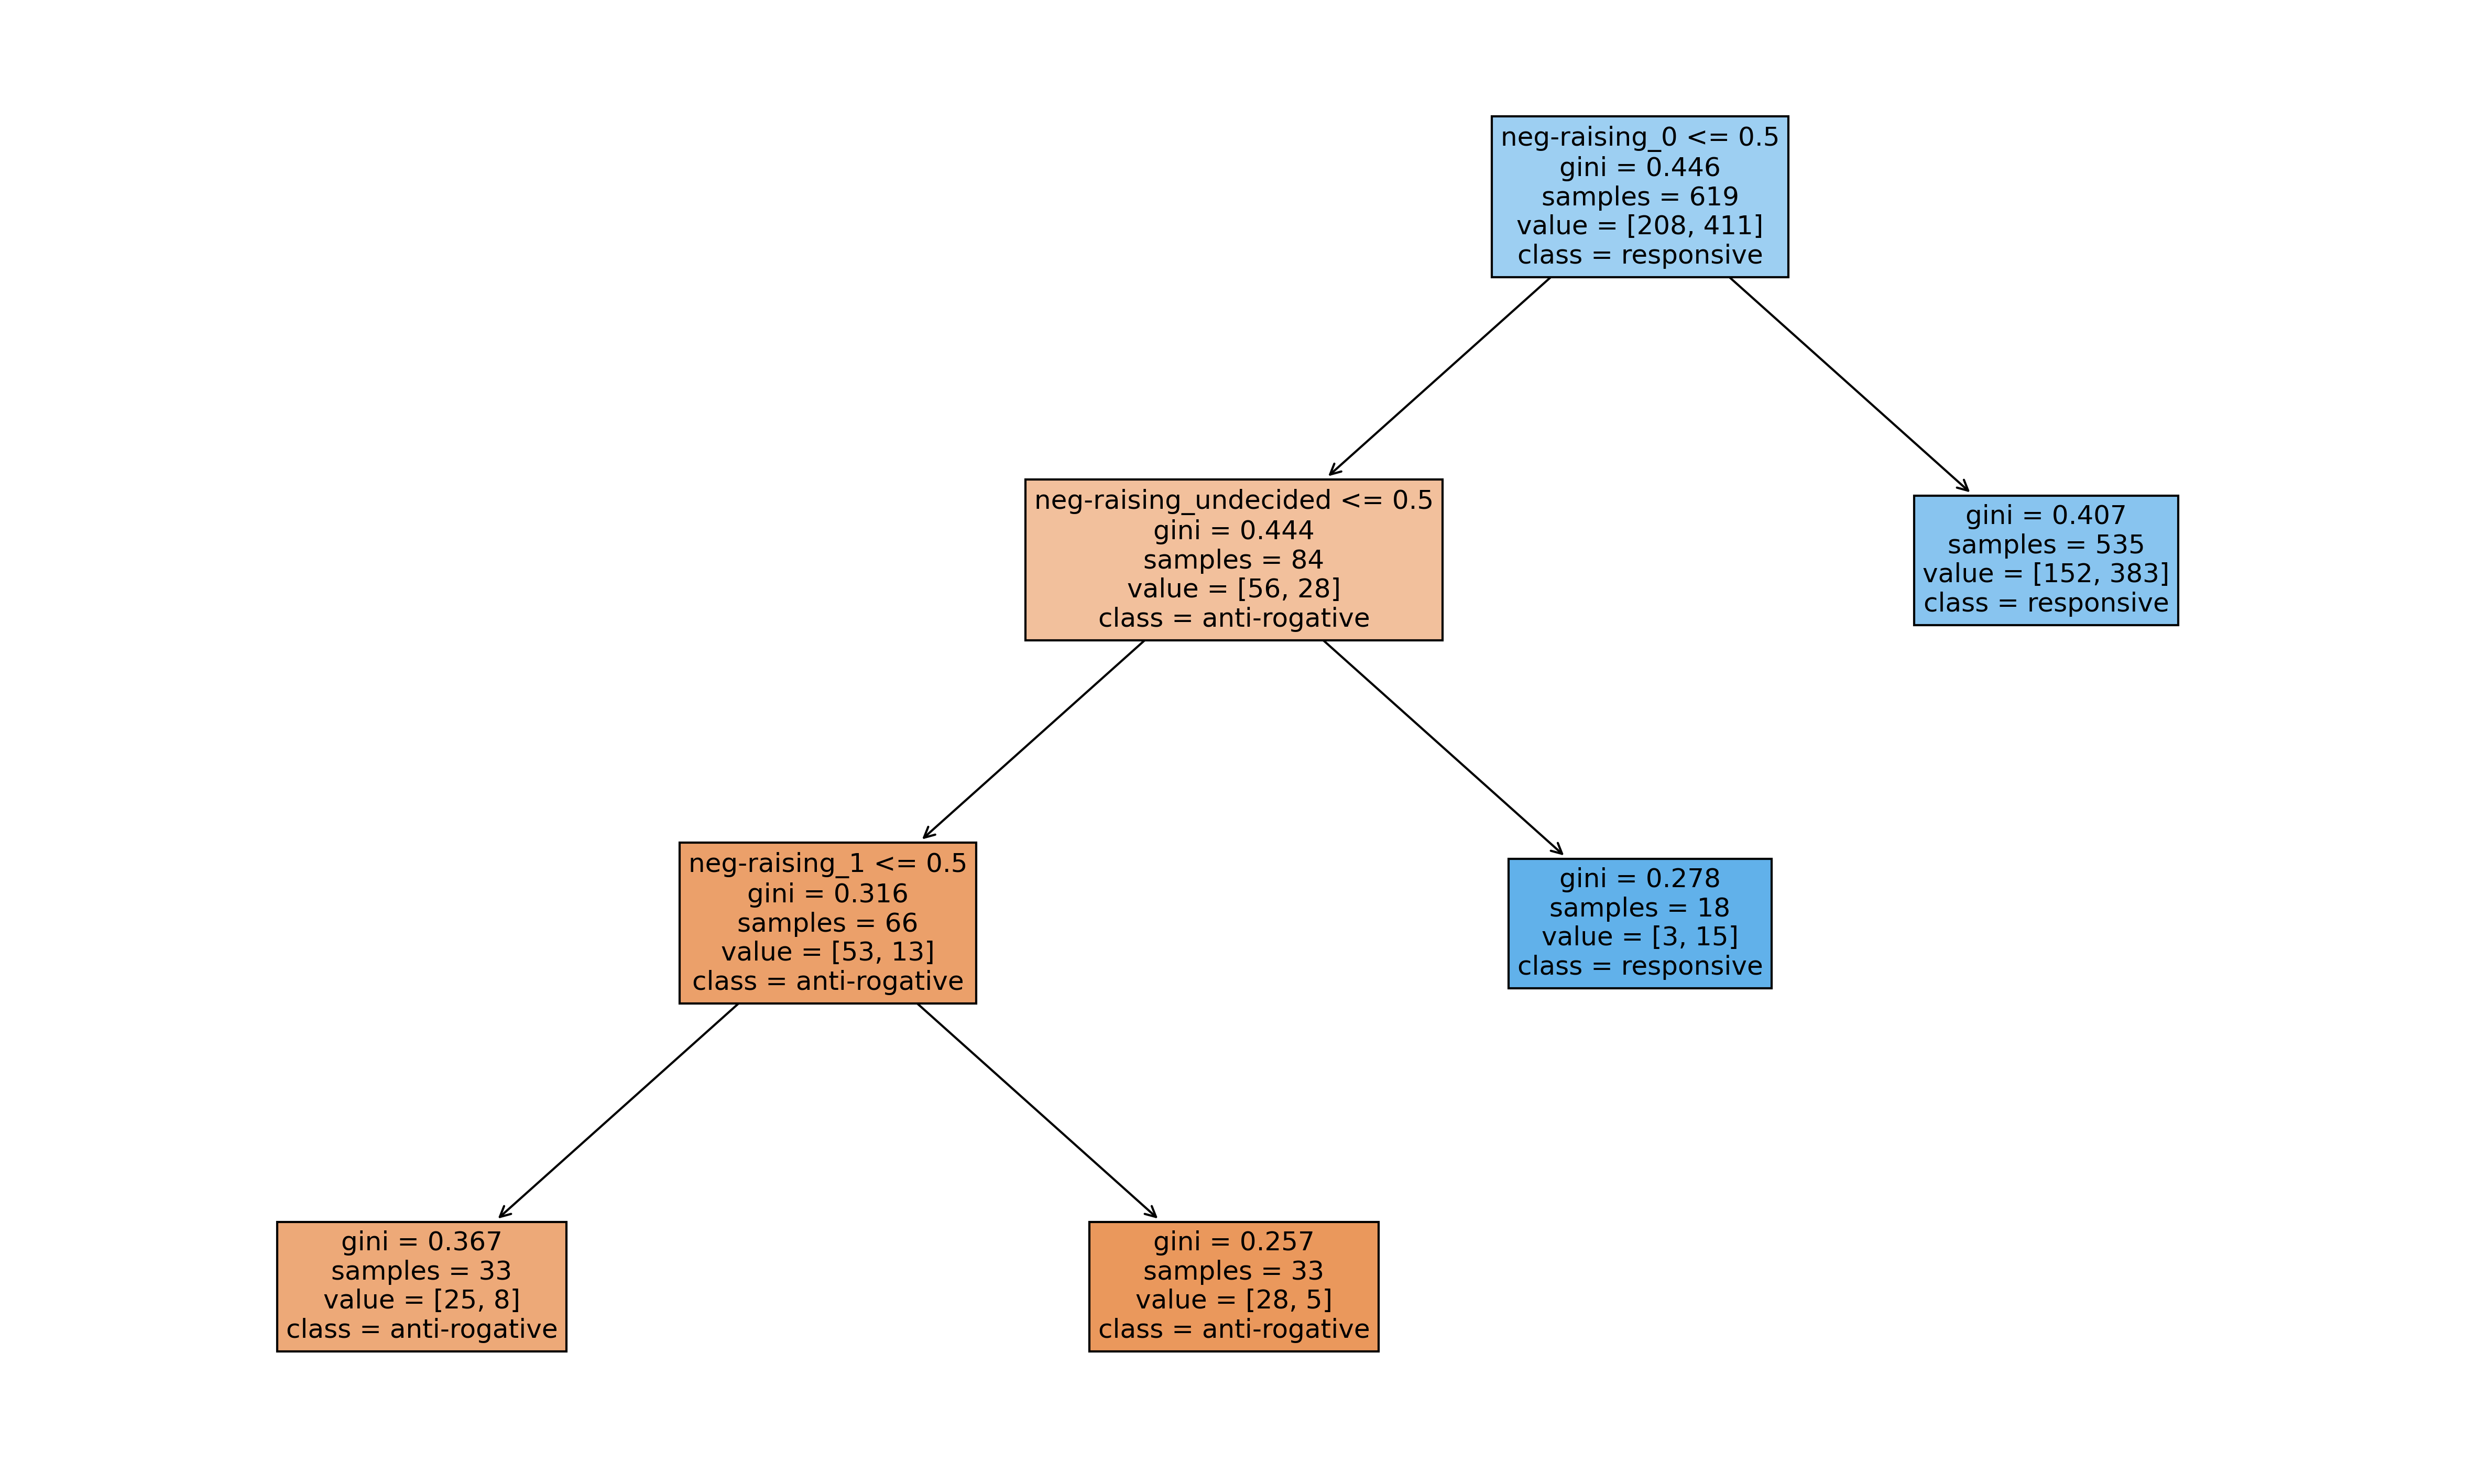

In [23]:
plt.figure(figsize=(20,12), dpi=300)
plot_tree(model, feature_names=X_nr.columns, filled=True, fontsize=12, class_names=["anti-rogative", "responsive"]);

In [26]:
branches = checker.retreive_text_branches(model, X_nr, y, exception_size=8, exception_indexes=True)
branches

[[('neg-raising_0', '0'),
  ('neg-raising_undecided', '0'),
  ('neg-raising_1', '0'),
  ('anti-rogative',
   25,
   'exceptions: 8',
   'exception_indexes: [42, 208, 317, 370, 389, 390, 424, 608]')],
 [('neg-raising_0', '0'),
  ('neg-raising_undecided', '0'),
  ('neg-raising_1', '1'),
  ('anti-rogative',
   28,
   'exceptions: 5',
   'exception_indexes: [34, 71, 192, 240, 519]')],
 [('neg-raising_0', '0'),
  ('neg-raising_undecided', '1'),
  ('responsive', 15, 'exceptions: 3', 'exception_indexes: [154, 155, 463]')]]

In [39]:
sem.iloc[[34, 71, 192, 240, 519]]

,language,predicate,English translation,predicate class,veridicality,conjoined with negation,conjoined with complement,projection through negation,neg-raising,likelihood,...,equal likelihood,certainty,counter-certainty,uncertainty,preference,opposition,indifference,focus sensitivity,gradability wrt decl,label
34,catalan,dubtar,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,compatible,incompatible,compatible,compatible,compatible,compatible,compatible,1.0,1,responsive
71,Dutch,verwachten,expect,doxastic,neither,neither,neither,neither,1,always,...,incompatible,compatible,incompatible,typically,compatible,compatible,compatible,0.0,1,responsive
192,Greek,perimeno,expect,doxastic,neither,neither,neither,neither,1,always,...,incompatible,typically,incompatible,compatible,compatible,compatible,compatible,0.0,1,responsive
240,hebrew,safék,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,incompatible,incompatible,compatible,compatible,compatible,compatible,compatible,1.0,1,responsive
519,spanish,dudar,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,compatible,incompatible,typically,compatible,compatible,compatible,compatible,1.0,1,responsive


In [40]:
preds = list(sem.iloc[[34, 71, 192, 240, 519]]['predicate'])

In [41]:
df[df['predicate'].isin(preds)]

,language,predicate,English translation,predicate class,veridicality,conjoined with negation,conjoined with complement,projection through negation,neg-raising,likelihood,...,opposition,indifference,focus sensitivity,gradability wrt decl,ignorance/belief wrt int,gradability wrt int,Q-to-P veridicality,Q-to-P distributivity,P-to-Q distributivity,label
34,catalan,dubtar,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,compatible,compatible,1.0,1,neither,1,0.0,0.0,0.0,responsive
77,Dutch,verwachten,expect,doxastic,neither,neither,neither,neither,1,always,...,compatible,compatible,0.0,1,belief,0,0.0,1.0,1.0,responsive
219,Greek,perimeno,expect,doxastic,neither,neither,neither,neither,1,always,...,compatible,compatible,0.0,1,belief,undecided,1.0,1.0,1.0,responsive
270,hebrew,safék,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,compatible,compatible,1.0,1,ignorance,1,0.0,0.0,0.0,responsive
580,spanish,dudar,doubt,dubitative,neither,neither,neither,neither,1,incompatible,...,compatible,compatible,1.0,1,neither,1,0.0,0.0,0.0,responsive


In [34]:
preds = list(sem.iloc[[42, 208, 317, 370, 389, 390, 424, 608]]['predicate'])

In [37]:
df[df['predicate'].isin(preds)]

,language,predicate,English translation,predicate class,veridicality,conjoined with negation,conjoined with complement,projection through negation,neg-raising,likelihood,...,opposition,indifference,focus sensitivity,gradability wrt decl,ignorance/belief wrt int,gradability wrt int,Q-to-P veridicality,Q-to-P distributivity,P-to-Q distributivity,label
48,catalan,preveure,expect,doxastic reading,neither,neither,neither,neither,typically neg-raising,always,...,compatible,compatible,0.0,0,belief,0,0.0,1.0,1.0,responsive
238,hebrew,lehaadíf,prefer,bouletic,neither,neither,neither,neither,typically neg-raising,compatible,...,incompatible,incompatible,1.0,1,neither,1,0.0,0.0,1.0,responsive
353,italian,dubitare,doubt,dubitative,neither,neither,neither,neither,typically neg-raising,incompatible,...,compatible,compatible,1.0,1,neither,1,0.0,0.0,0.0,responsive
414,Kîîtharaka,îrîgîîra,hope,bouletic,neither,neither,neither,neither,typically neg-raising,always,...,incompatible,incompatible,1.0,1,typically belief,1,0.0,1.0,1.0,responsive
433,Kîîtharaka,îtîgîa,believe,doxastic,typically veridical,neither,neither,typically projective,typically neg-raising,always,...,compatible,typically,0.0,1,belief,1,0.0,1.0,1.0,responsive
434,Kîîtharaka,îrîgîîra,expect,doxastic,neither,neither,neither,neither,typically neg-raising,typically,...,incompatible,incompatible,0.0,1,belief,1,0.0,1.0,1.0,responsive
472,Mandarin Chinese,tiyi,propose,directive,neither,neither,neither,neither,typically neg-raising,compatible,...,compatible,compatible,1.0,0,typically ignorance,0,0.0,1.0,1.0,responsive
685,turkish,düşün-,think,doxastic evaluative,neither,neither,neither,neither,typically neg-raising,always,...,compatible,compatible,0.0,0,ignorance,0,0.0,0.0,0.0,responsive


In [38]:
df[df['predicate'].isin(preds)]['English translation']

48      expect
238     prefer
353      doubt
414       hope
433    believe
434     expect
472    propose
685      think
Name: English translation, dtype: object